# Station Density Profile of Westcoast Earthquake Early Warning Stations

### Ran at following commit levels
MagD commit https://github.com/pnsn/magD/tree/v1.1

magd_client commit https://github.com/pnsn/magd_client/tree/v1.1

## Create csv of all EEW sites

Must have the following headers:
* net
* sta
* chan
* location
* lat
* lon
* rate*

*sample rate(not required)


## Clean CSV

ShakeAlert Coordinator provided two xls files, one current west coast eew, on notional west coast eew. Since this is densisty problem, location, and chan are disregarded. Both files were edited in Excel, where the headers were renamed and the following columns were added to prevent errrors:
* chan
* location
* rate
These files were then saved as CSV to 
* ./csv/west_coast/current-3-27-2019.csv 
* ./csv/west_coast/notional-3-27-2019.csv

In [ ]:
%run scripts/clean_csv.py -i csv/eew_density/eew_stas_current_all.csv -o csv/eew_density/eew_stas_current_clean.csv

In [30]:
##some constants for all plots
#path to local magd_client
import os
magd_client_path = '/Users/joncon/Sites/magd_client/'

lat_min=29.0
lat_max=54.0
lon_min=-131.0
lon_max=-112.0

resolution=1
#number of stations to use in solution. 
num_solutions=4

#create dicts to hold grid paths
grid_paths = {}

# wave velocities
velocity_p = 5.4
velocity_s = 3



In [5]:
#only run once
import os
os.chdir(magd_client_path)
print('Working in ' + magd_client_path)
from magD.pickle import *
#set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

Working in /Users/joncon/Sites/magd_client/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create and save MapGrids

In [31]:
#name of config file in ./config/{name}.ini
name ="west_coast_existing"

#contour around event
%run -i scripts/make_grids.py \
--name=$name \
--grid_type=dist_max \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--resolution=$resolution \
--num_solutions=$num_solutions

#instantiate grid object(s) using _grid_paths dict created by script
grid_paths[name] = _grid_path
grid_wc_existing = get_pickle(grid_paths[name])

spatialllllyyyyyyyyyy
475
Profiling spatially...
Path for dist_max:
  /Users/joncon/Sites/magd_client/scripts/../pickle_jar/west_coast_existing/dist_max_grid/25x19-res-1.0.pickle


In [32]:
#name of config file in ./config/{name}.ini
name ="west_coast_existing_and_notional"

#contour around event
%run -i scripts/make_grids.py \
--name=$name \
--grid_type=dist_max \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--resolution=$resolution \
--num_solutions=$num_solutions

#instantiate grid object(s) using _grid_paths dict created by script
grid_paths[name] = _grid_path
grid_wc_complete = get_pickle(grid_paths[name])


spatialllllyyyyyyyyyy
475
Profiling spatially...
Path for dist_max:
  /Users/joncon/Sites/magd_client/scripts/../pickle_jar/west_coast_existing_and_notional/dist_max_grid/25x19-res-1.0.pickle


In [33]:
# diff of notional and existing
#pass into args
#type: the catoregory with will also be the folder of pickle file
#name: name of pickle file
grid_diff_wc = grid_wc_complete.copy("diff_west_coast", "diff_wc_density")
grid_diff_wc.matrix = grid_wc_existing.matrix - grid_wc_complete.matrix
grid_diff_wc.save()
grid_diff_wc_path= grid_diff_wc.get_path()

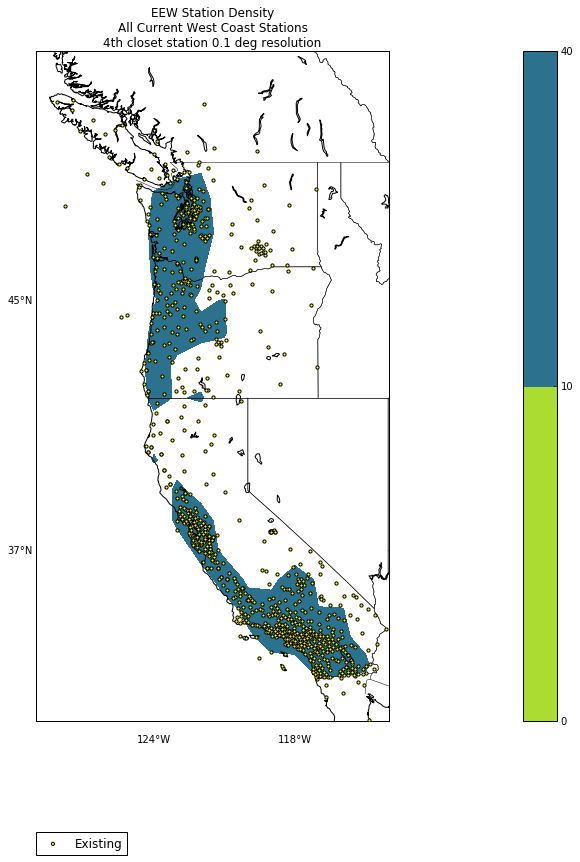

In [34]:
##if needed, overide default marker attrs and save 
grid_wc_existing.markers['west_coast_existing']['color']='yellow'
grid_wc_existing.markers['west_coast_existing']['symbol']='o'
grid_wc_existing.markers['west_coast_existing']['size']=10
grid_wc_existing.save()

path = grid_paths['west_coast_existing']
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Station Density" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0,10,40

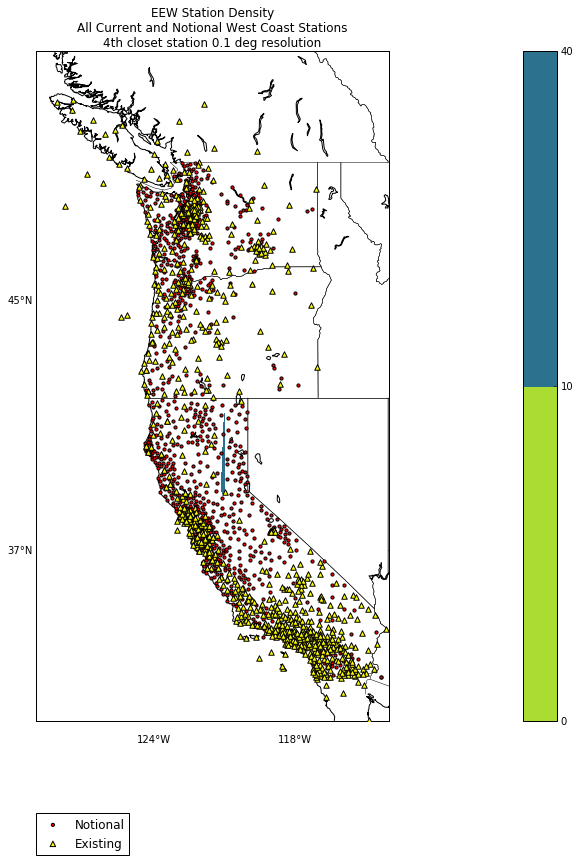

In [27]:
##overide default marker attrs and save
grid_wc_complete.markers['west_coast_notional']['color']='red'
grid_wc_complete.markers['west_coast_notional']['symbol']='o'
grid_wc_complete.markers['west_coast_notional']['size']=10
grid_wc_complete.save()


path = grid_paths['west_coast_existing_and_notional']
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Station Density" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0,10,40

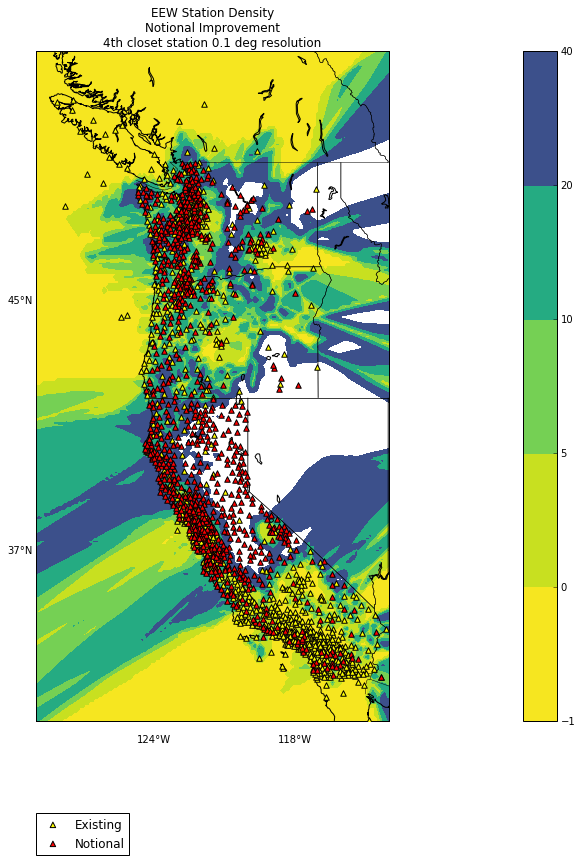

In [32]:
path = grid_diff_wc_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Station Density" \
--title2="Notional Improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=-1,0,5,10,20,40

## Blind zone

In [41]:
#create blindzone(no alert) grid for depth
#######8km#################
#existing
grid_wc_existing_bz8 = grid_wc_existing.copy("diff_west_coast", "wc_existing_bz8")
grid_wc_existing_bz8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_wc_existing_bz8.save()
grid_wc_existing_bz8_path = grid_wc_existing_bz8.get_path()

#complete 
grid_wc_complete_bz8 = grid_wc_complete.copy("diff_west_coast", "wc_complete_bz8")
grid_wc_complete_bz8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_wc_complete_bz8.save()
grid_wc_complete_bz8_path = grid_wc_complete_bz8.get_path()

#diff
grid_wc_diff_bz8 = grid_wc_complete_bz8.copy("diff_west_coast", "diff_wc_bz8")
grid_wc_diff_bz8.matrix = grid_wc_existing_bz8.matrix - grid_wc_complete_bz8.matrix
grid_wc_diff_bz8.save()
grid_wc_diff_bz8_path= grid_wc_diff_bz8.get_path()

#######20km###########

grid_wc_existing_bz20 = grid_wc_existing.copy("diff_west_coast", "wc_existing_bz20")
grid_wc_existing_bz20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_wc_existing_bz20.save()
grid_wc_existing_bz20_path = grid_wc_existing_bz20.get_path()

#complete 
grid_wc_complete_bz20 = grid_wc_complete.copy("diff_west_coast", "wc_complete_bz20")
grid_wc_complete_bz20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_wc_complete_bz20.save()
grid_wc_complete_bz20_path = grid_wc_complete_bz20.get_path()

#diff
grid_wc_diff_bz20 = grid_wc_complete_bz20.copy("diff_west_coast", "diff_wc_bz20")
grid_wc_diff_bz20.matrix = grid_wc_existing_bz20.matrix - grid_wc_complete_bz20.matrix
grid_wc_diff_bz20.save()
grid_wc_diff_bz20_path= grid_wc_diff_bz20.get_path()

######50km#########  

grid_wc_existing_bz50 = grid_wc_existing.copy("diff_west_coast", "wc_existing_bz50")
grid_wc_existing_bz50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_wc_existing_bz50.save()
grid_wc_existing_bz50_path = grid_wc_existing_bz50.get_path()

#complete 
grid_wc_complete_bz50 = grid_wc_complete.copy("diff_west_coast", "wc_complete_bz50")
grid_wc_complete_bz50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_wc_complete_bz50.save()
grid_wc_complete_bz50_path = grid_wc_complete_bz50.get_path()

#diff
grid_wc_diff_bz50 = grid_wc_complete_bz50.copy("diff_west_coast", "diff_wc_bz50")
grid_wc_diff_bz50.matrix = grid_wc_existing_bz50.matrix - grid_wc_complete_bz50.matrix
grid_wc_diff_bz50.save()
grid_wc_diff_bz50_path= grid_wc_diff_bz50.get_path()

### 8km deep

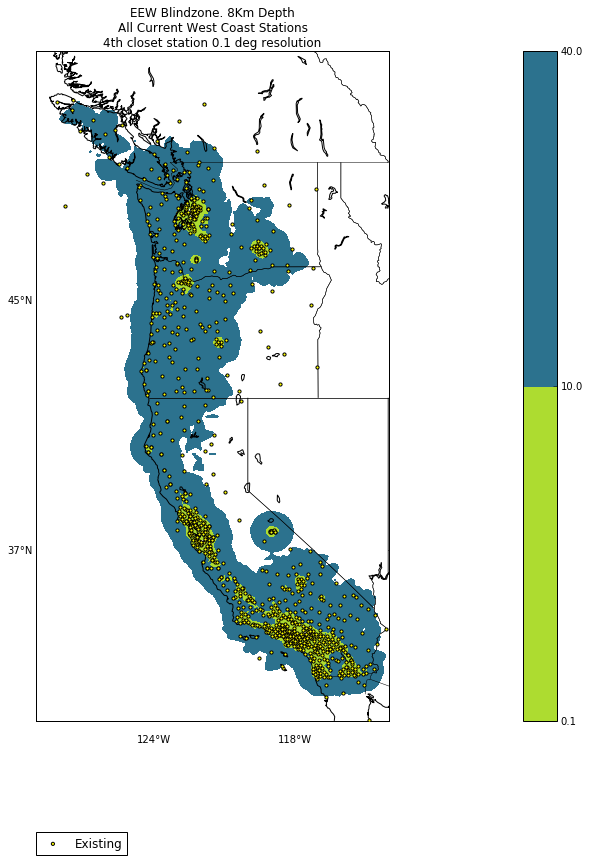

In [37]:
path=grid_wc_existing_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

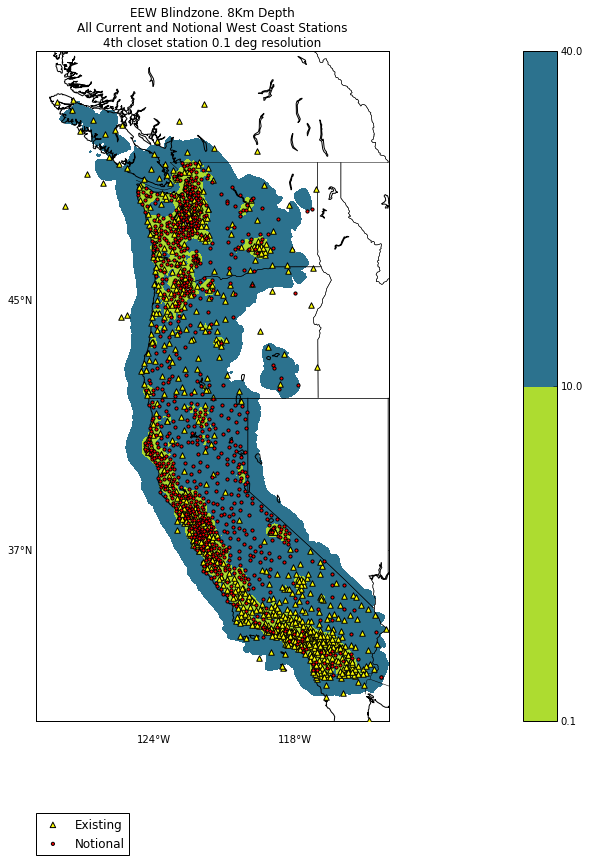

In [38]:
path=grid_wc_complete_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

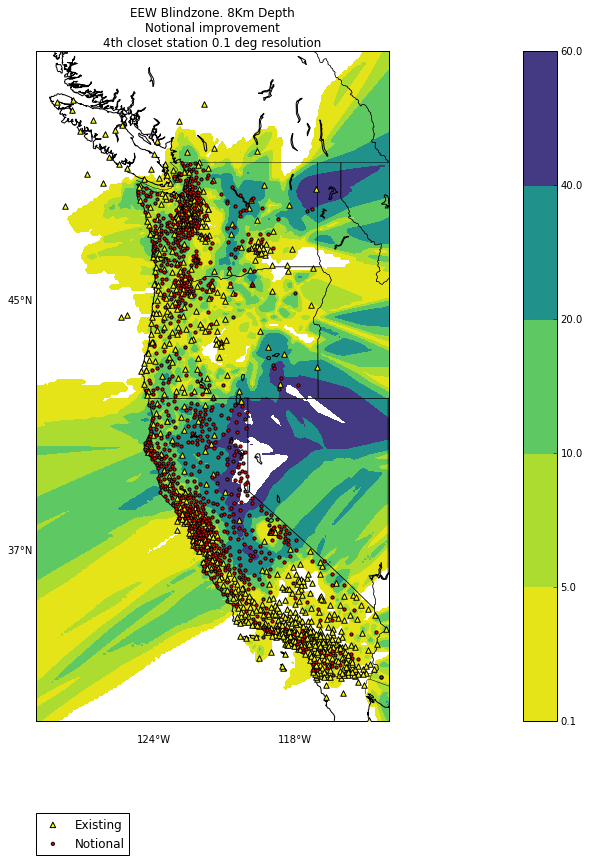

In [39]:
path=grid_wc_diff_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,5,10,20,40,60

### 20km

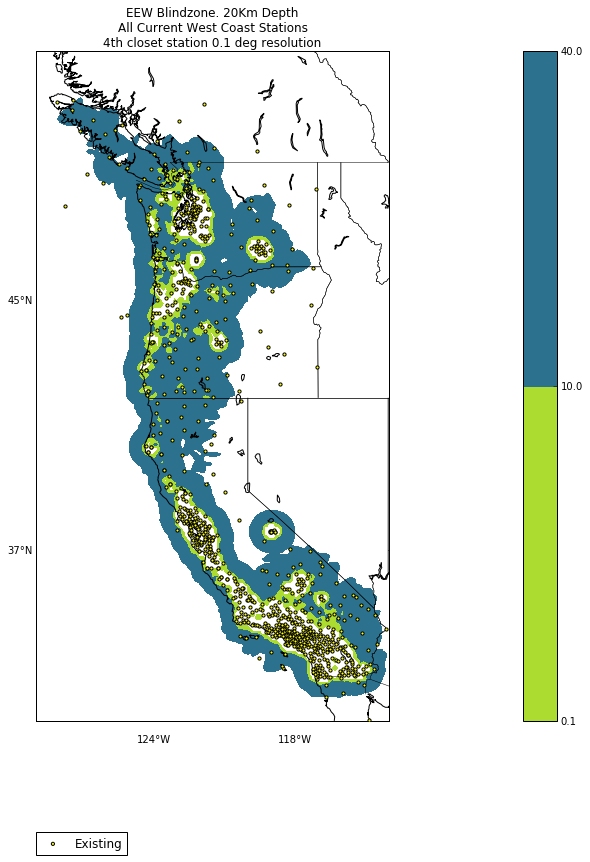

In [42]:
path=grid_wc_existing_bz20_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 20Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

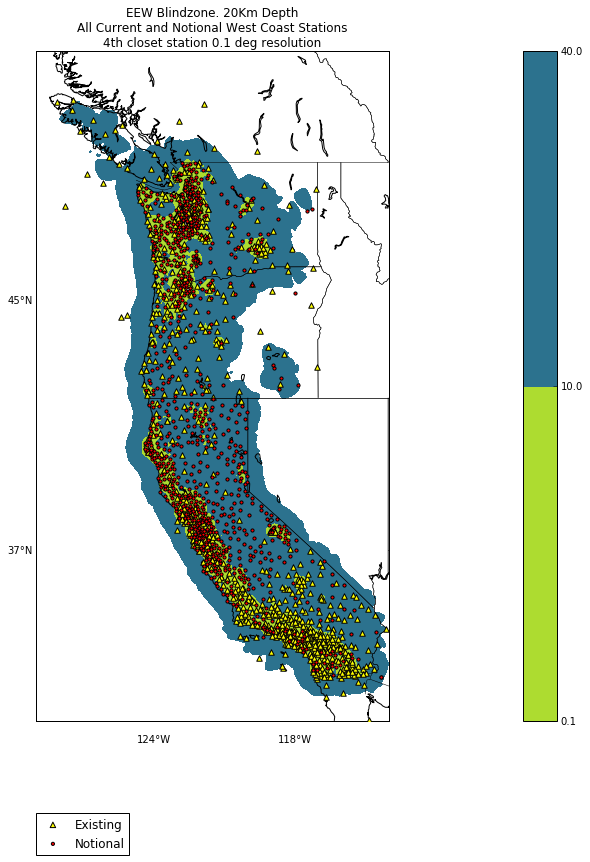

In [43]:
path=grid_wc_complete_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 20Km Depth" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

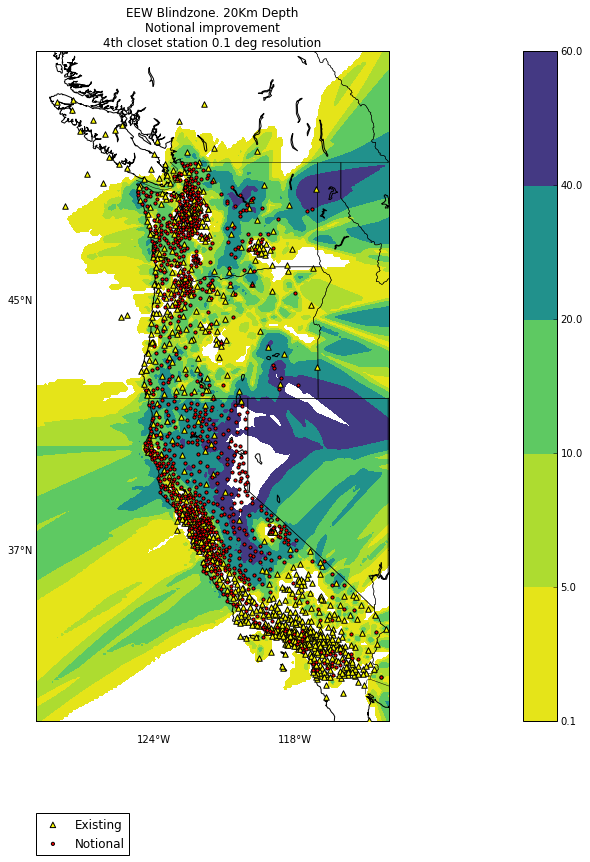

In [44]:
path=grid_wc_diff_bz20_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 20Km Depth" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,5,10,20,40,60

### 50km

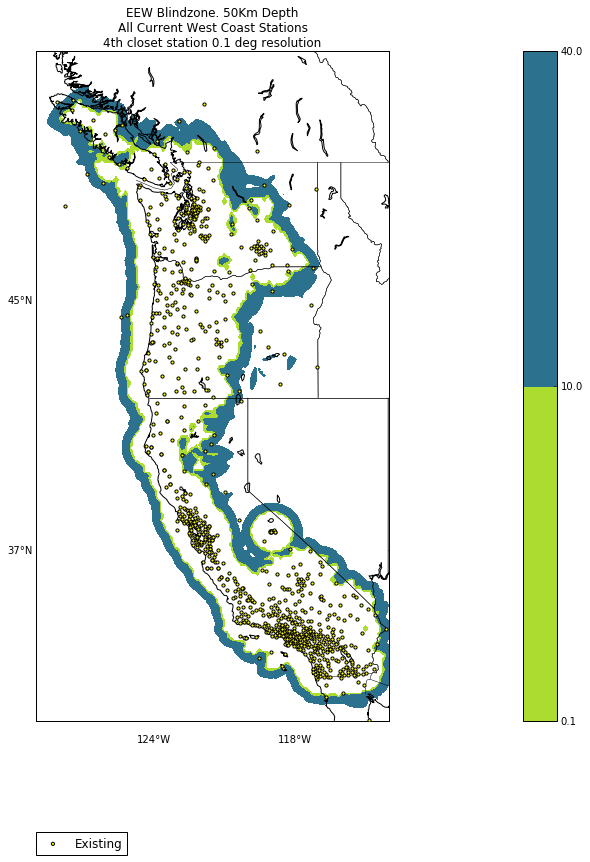

In [45]:
path=grid_wc_existing_bz50_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 50Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

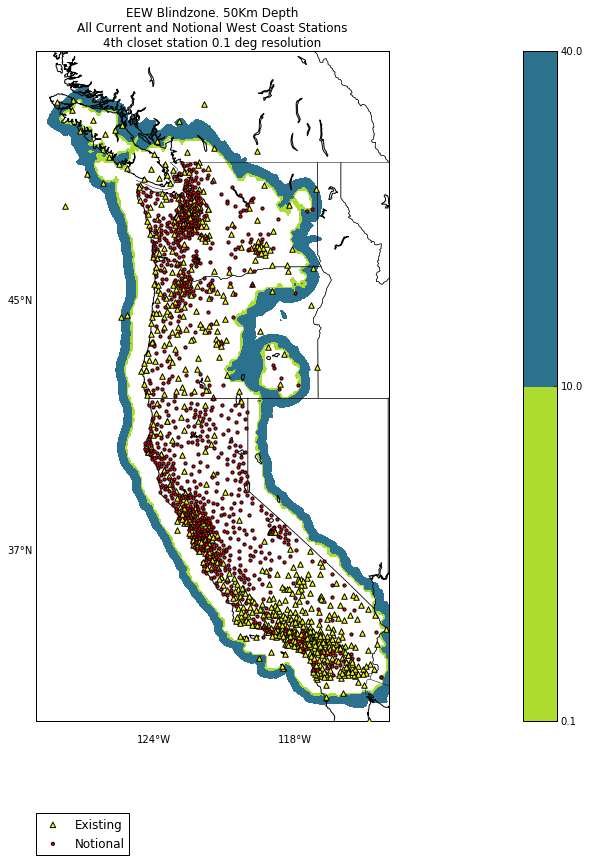

In [46]:
path=grid_wc_complete_bz50_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 50Km Depth" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

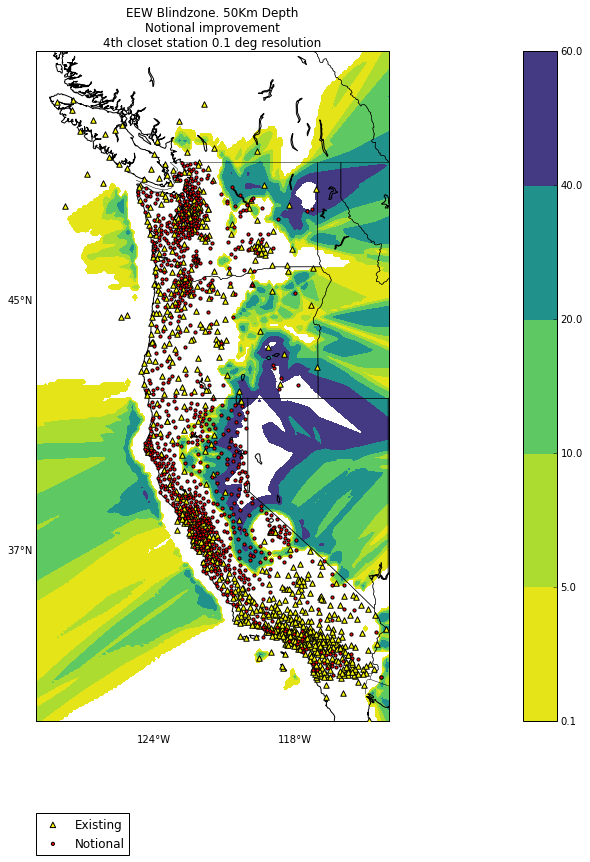

In [47]:
path=grid_wc_diff_bz50_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 50Km Depth" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,5,10,20,40,60